In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
mushroom=pd.read_csv('mushroomdataset.csv')
print(mushroom)

     classes cap-shape cap-surface cap-color bruises odor gill-attachment  \
0          p         x           s         n       t    p               f   
1          e         x           s         y       t    a               f   
2          e         b           s         w       t    l               f   
3          p         x           y         w       t    p               f   
4          e         x           s         g       f    n               f   
...      ...       ...         ...       ...     ...  ...             ...   
8119       e         k           s         n       f    n               a   
8120       e         x           s         n       f    n               a   
8121       e         f           s         n       f    n               a   
8122       p         k           y         n       f    y               f   
8123       e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0  

In [5]:
mushroom.notnull().sum()

classes                     8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-type                   8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

In [17]:
print(mushroom['stalk-root'])

0       e
1       c
2       c
3       e
4       e
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 8124, dtype: object


In [18]:
#lets find how many no. of records are there with '?'
print(np.unique(mushroom['stalk-root'], return_counts=True))

(array(['?', 'b', 'c', 'e', 'r'], dtype=object), array([2480, 3776,  556, 1120,  192], dtype=int64))


In [9]:
mushroom['stalk-root'].describe()

[count     8124
 unique       5
 top          b
 freq      3776
 Name: stalk-root, dtype: object]

In [20]:
# all missing values are marked with a '?' mark. Lets convert it to NaN.
mushroom = mushroom.replace({'?':np.NaN})
print(mushroom.isna().sum())

classes                        0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [21]:
# lets replace these value with 'm'
mushroom['stalk-root'] = mushroom['stalk-root'].replace(np.NaN,'m')
print(mushroom['stalk-root'].value_counts())

b    3776
m    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64


In [23]:
#lets find the base line accuracy
mushroom['classes'].value_counts(normalize=True)

# the base line model says 51% is edible

e    0.517971
p    0.482029
Name: classes, dtype: float64

In [27]:
# here the target variable which is classes: edible=e, poisonous=p has only two values
# lets encode these values using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mushroom['classes']=le.fit_transform(mushroom['classes'])
mushroom.head(10)

#so here edible=e->0, poisonous=p->1

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,0,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,0,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,0,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,1,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,0,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [30]:
# Now lets go for other value to encode, so we saw that the other values has more than two values,
# Hence, label encoding will not work for them, so we will go for one hot encoding technique.
# lets encode all the input values using one hot encoding

from sklearn.preprocessing import OneHotEncoder
mushroom_encode_data=pd.get_dummies(mushroom)
mushroom_encode_data.head(10)

,classes,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [31]:
# separating the input and output/target variables
import numpy as np
x=mushroom_encode_data.drop(columns=['classes'],axis=1)
y=mushroom_encode_data[['classes']]

print(x.shape)
print(y.shape)

(8124, 117)
(8124, 1)


In [32]:
#dividing the train and test dataset
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(6499, 117) (1625, 117)
(6499, 1) (1625, 1)


In [33]:
#defining the models which will be used for model building
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.svm import SVC
sv=SVC()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 3)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=240,random_state=49)

In [34]:
#appending all the models
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',sv))
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('MultinomialNB',mnb))
models.append(('RandomForestClassifier',rf))

In [35]:
#lets import all the classification outputs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

************************ LogisticRegression **********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score: 0.9993846153846154


Cross Value Score: 0.9677588327607414


roc_auc_score: 0.9993614303959131


Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Confusion Matrix:
 [[842   0]
 [  1 782]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************ SVC *******************

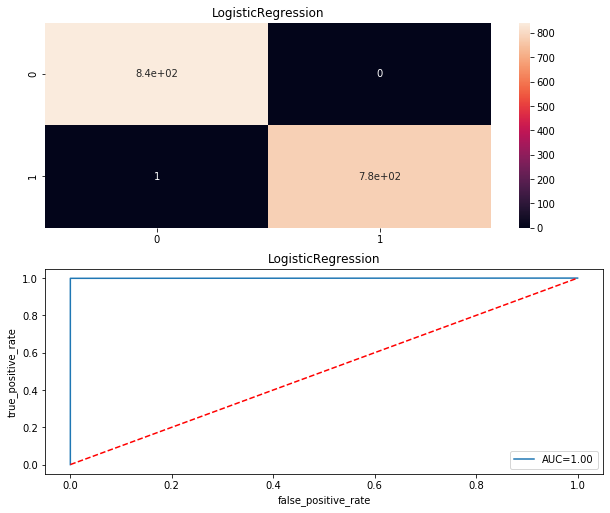

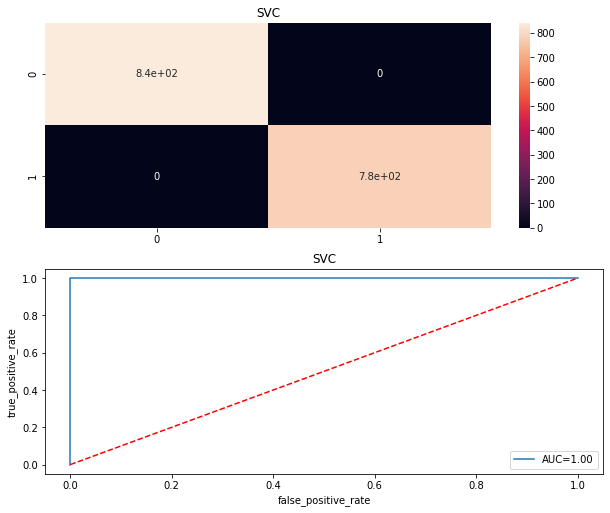

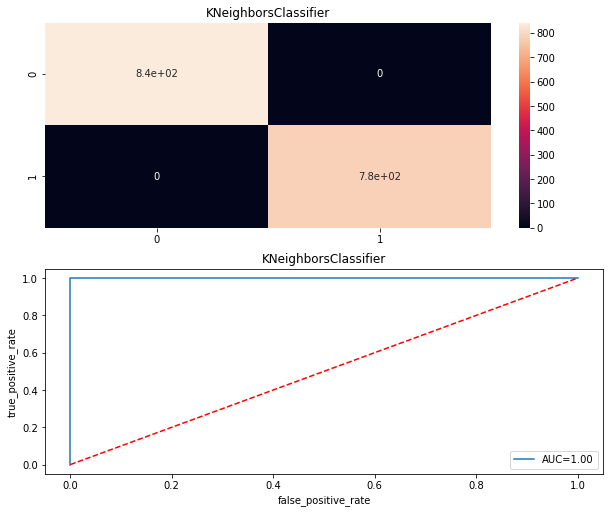

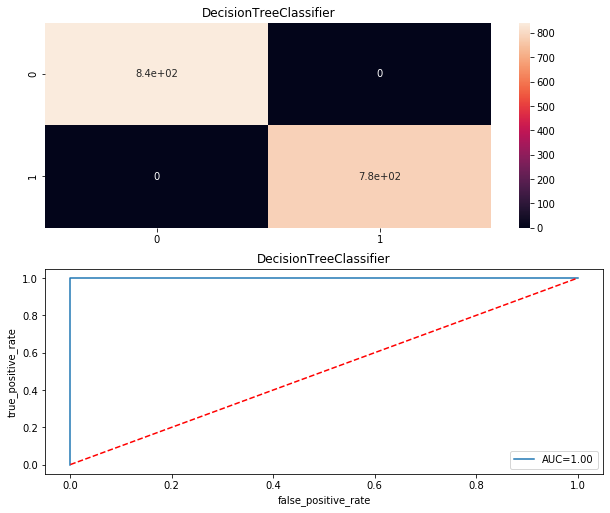

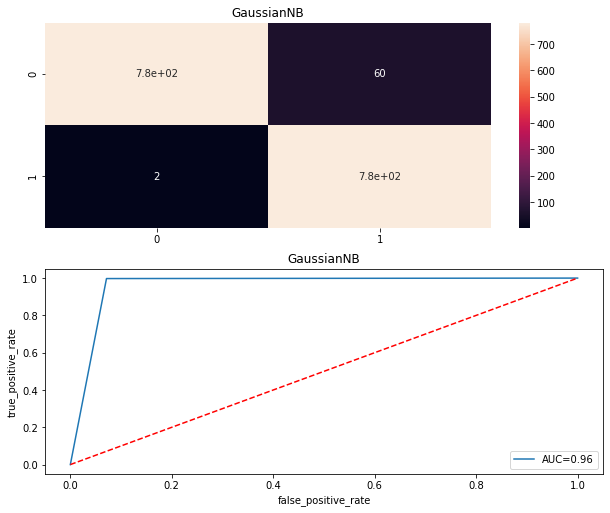

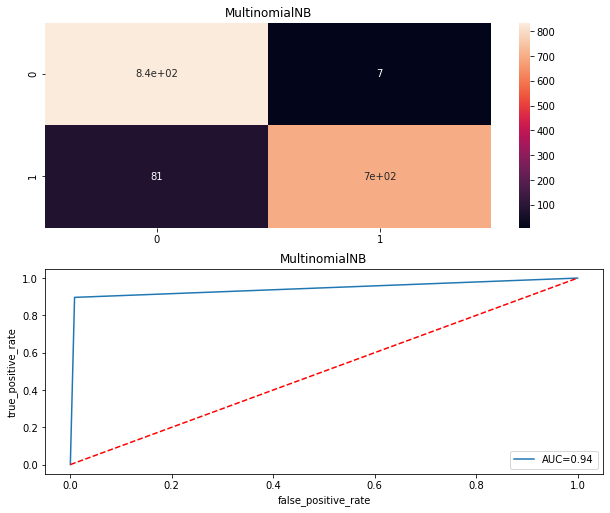

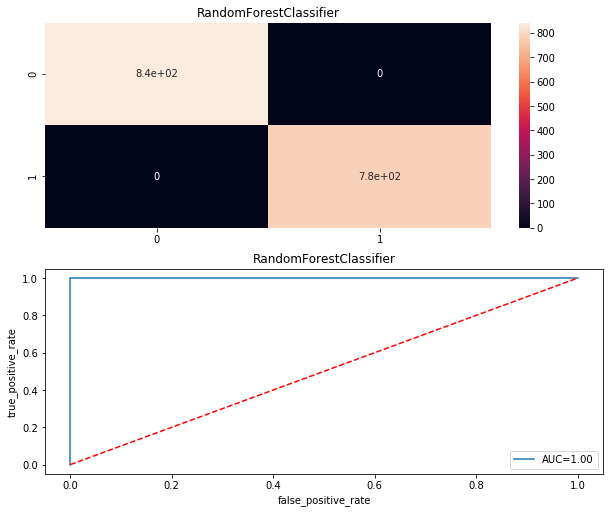

In [43]:
#printing the output of each model
Model=[]
score=[]
cvs=[]
rocscore=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model, x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score:',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score:',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    cr=classification_report(y_test,pred)
    print('Classification Report:',cr )
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('Confusion Matrix:\n',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('true_positive_rate')
    plt.xlabel('false_positive_rate')
    print('\n\n')

In [38]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Value_Score':cvs,'Roc_Auc_Curve':rocscore})
print(result)

                    Model  Accuracy_Score  Cross_Value_Score  Roc_Auc_Curve
0      LogisticRegression       99.938462          96.775883      99.936143
1                     SVC      100.000000          95.841316     100.000000
2    KNeighborsClassifier      100.000000          95.361006     100.000000
3  DecisionTreeClassifier      100.000000          96.826538     100.000000
4              GaussianNB       96.184615          91.470334      96.309341
5           MultinomialNB       94.584615          92.419973      94.411909
6  RandomForestClassifier      100.000000          96.580233     100.000000


In [40]:
#so here by looking to all model DecisionTreeClassifier is the best model, so we will fianalise this model
#so saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(dtc,'dtc_mushroom.obj')

['dtc_mushroom.obj']

In [41]:
# load the model from the file
dtc_from_joblib=joblib.load('dtc_mushroom.obj')

In [42]:
#Use the loaded model to make predictionsdtc_from_joblib.predict(x_test)

array([1, 1, 0, ..., 0, 0, 1])